In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
airbnb = pd.read_csv('C:\\Users\\hp\\Downloads\\Airbnb NYC 2019 - Airbnb NYC 2019.csv')


In [ ]:
# Q1) Find disribution of Airbnb booking price range.

Text(0.5, 1.0, 'Distribution of Price Range')

<Figure size 800x800 with 0 Axes>

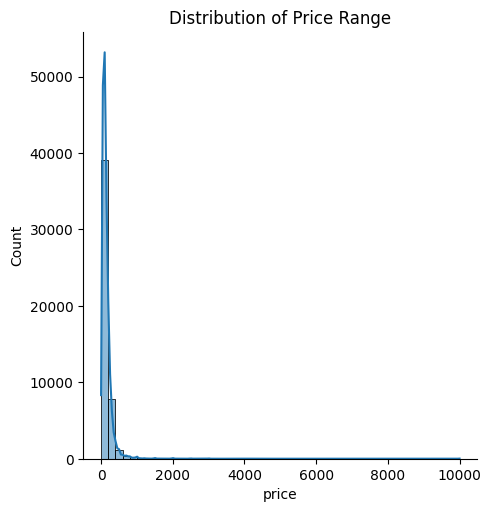

In [15]:
plt.figure(figsize=(8,8))
sns.displot(airbnb['price'],bins=50,kde=True)
plt.title("Distribution of Price Range")

In [ ]:
# Q2) Find total listing/property count in each neighbourhood group in NYC.

In [16]:
airbnb.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [ ]:
# Q3) Find the average price of listing/properties in each neighbourhood groups and also neighbourhoods.

In [17]:
airbnb.groupby("neighbourhood_group")['price'].agg(['median','mean']).sort_values('median',ascending=False)

,median,mean
neighbourhood_group,,
Manhattan,150.0,196.875814
Brooklyn,90.0,124.383207
Queens,75.0,99.517649
Staten Island,75.0,114.812332
Bronx,65.0,87.496792


In [18]:
airbnb.groupby("neighbourhood")['price'].agg(['median','mean']).sort_values('median',ascending=False)

,median,mean
neighbourhood,,
Fort Wadsworth,800.0,800.000000
Woodrow,700.0,700.000000
Tribeca,295.0,490.638418
Neponsit,274.0,274.666667
NoHo,250.0,295.717949
...,...,...
Corona,40.0,59.171875
Hunts Point,40.0,50.500000
New Dorp Beach,40.0,57.400000


In [ ]:
# Q4) Find top neighbourhoods and hosts by listing/property in entire NYC

In [19]:
neighbourhood_group=airbnb.neighbourhood_group.unique()
for n in neighbourhood_group:
    print(f'top 5 neighbourhood in  neighbourhood_group {n}')
    print(airbnb.loc[airbnb['neighbourhood_group']==n]['neighbourhood'].value_counts()[:5])
    print()

top 5 neighbourhood in  neighbourhood_group Brooklyn
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Bushwick              2465
Crown Heights         1564
Greenpoint            1115
Name: count, dtype: int64

top 5 neighbourhood in  neighbourhood_group Manhattan
neighbourhood
Harlem             2658
Upper West Side    1971
Hell's Kitchen     1958
East Village       1853
Upper East Side    1798
Name: count, dtype: int64

top 5 neighbourhood in  neighbourhood_group Queens
neighbourhood
Astoria             900
Long Island City    537
Flushing            426
Ridgewood           423
Sunnyside           363
Name: count, dtype: int64

top 5 neighbourhood in  neighbourhood_group Staten Island
neighbourhood
St. George       48
Tompkinsville    42
Stapleton        27
Concord          26
Arrochar         21
Name: count, dtype: int64

top 5 neighbourhood in  neighbourhood_group Bronx
neighbourhood
Kingsbridge    70
Fordham        63
Longwood       62
Mott Haven     60
Concourse

In [ ]:
# Q5) Find the number of active hosts per location by each neighbourhood groups.

In [21]:
airbnb.host_id.value_counts().head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [ ]:
 # Q6) Find the total counts of each room types in entire NYC.

In [22]:
(airbnb['room_type'].value_counts())

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [ ]:
# Q7) Find stay requirement counts by minimum nights .

In [23]:
airbnb.groupby('neighbourhood_group').agg({'price':'median','minimum_nights':'median'}).sort_values("price",ascending=False)

,price,minimum_nights
neighbourhood_group,,
Manhattan,150.0,3.0
Brooklyn,90.0,3.0
Queens,75.0,2.0
Staten Island,75.0,2.0
Bronx,65.0,2.0


In [ ]:
# Q8) Find the total number of reviews and maximum reviews by each neighbourhood groups.

In [24]:
airbnb.value_counts('number_of_reviews')

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
352        1
351        1
341        1
340        1
629        1
Name: count, Length: 394, dtype: int64

In [25]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
print(top_reviewed_listings)

             id                                               name   host_id  \
11759   9145202                            Room near JFK Queen Bed  47621202   
2031     903972                         Great Bedroom in Manhattan   4734398   
2030     903947                     Beautiful Bedroom in Manhattan   4734398   
2015     891117                       Private Bedroom in Manhattan   4734398   
13495  10101135                            Room Near JFK Twin Beds  47621202   
10623   8168619                  Steps away from Laguardia airport  37312959   
1879     834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870    3474320                 Private brownstone studio Brooklyn  12949460   
471      166172                    LG Private Room/Family Friendly    792159   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
11759      Dona              Queens       

In [26]:
airbnb.groupby(['neighbourhood_group'])['number_of_reviews'].max()

neighbourhood_group
Bronx            321
Brooklyn         488
Manhattan        607
Queens           629
Staten Island    333
Name: number_of_reviews, dtype: int64

In [ ]:
# Q9) Find most reviewd room type in neighbourhood groups per month.

In [27]:
airbnb.groupby(['room_type'])['reviews_per_month'].max()

room_type
Entire home/apt    15.78
Private room       58.50
Shared room        10.77
Name: reviews_per_month, dtype: float64

In [ ]:
# Q10) Find best location listing/property location for travelers.

In [28]:
airbnb.groupby(['neighbourhood'])['number_of_reviews'].idxmax()

neighbourhood
Allerton             510
Arden Heights      29604
Arrochar           22024
Arverne             2922
Astoria              257
                   ...  
Windsor Terrace     1000
Woodhaven           3020
Woodlawn             433
Woodrow             3049
Woodside             746
Name: number_of_reviews, Length: 221, dtype: int64

In [ ]:
# Q11) Find also best location listing/property location for hosts.

In [30]:
airbnb.groupby(['neighbourhood'])['calculated_host_listings_count'].idxmax()

neighbourhood
Allerton           10781
Arden Heights      29604
Arrochar           20095
Arverne             5341
Astoria            36025
                   ...  
Windsor Terrace     4992
Woodhaven          22342
Woodlawn           30008
Woodrow             3049
Woodside           33471
Name: calculated_host_listings_count, Length: 221, dtype: int64

In [ ]:
# Q12) Find price variations in NYC neighbourhood groups.

<Axes: xlabel='price', ylabel='count'>

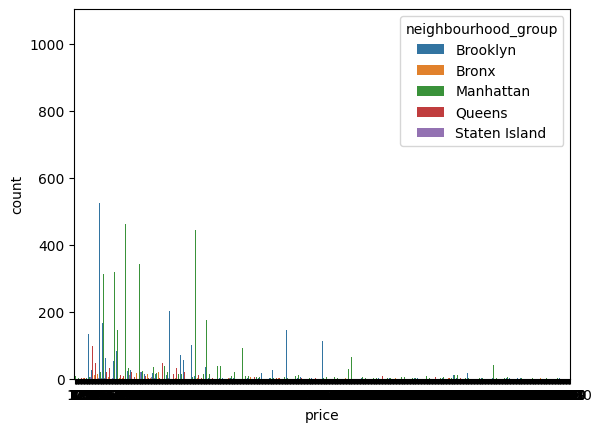

In [32]:
sns.countplot(x='price',hue='neighbourhood_group',data=airbnb)